# Project : Evaluate Cars Condition based on giving feature

- buying feature categorical buying price
- maint feature categorical price of the maintenance
- doors feature categorical number of doors
- persons feature categorical capacity in the terms of persons to carry
- lug_boot feature categorical the size of luggage boot
- safety feature categorical estimated safty of the car
- class taget feature categorical evaluation level (unacceptable, acceptable, good, very good)

#### based on this feature predict the car condition

## Step 1 : Import Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

## Step 2 : Load Dataset

In [2]:
df = pd.read_csv(r"C:\123\Aditya\DS\Imarticus Learning\6. Machine Learning\Data set\Decision Tree\cars.csv", header = None)
df.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
# check category level of all columns
for col in df.columns: 
    print("-----------------{}------------------".format(col))
    print(df[col].value_counts())
    print()

-----------------buying------------------
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

-----------------maint------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

-----------------doors------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

-----------------persons------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64

-----------------lug_boot------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

-----------------safety------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64

-----------------classes------------------
classes
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



In the above values counts we can see in two column we have categoru and numbers so we need to replace the categories with the numbers using lable encoder

## Step 3 : Data Preprocessing 

In [5]:
# check missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

In the above data we can see there in no missing values

In [6]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   classes   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


We need to perform label encoder on all the columns bcoz all the columns contain object data type

In [7]:
#apply lable encoer to convert categories into numeric values
le = LabelEncoder()

for x in df.columns:
    df[x] = le.fit_transform(df[x])
    le_name = dict(zip(le.classes_, le.transform(le.classes_)))
    print("-----------------------------------------------------")
    print("Feature : ",x)
    print("Mapping : ", le_name)

-----------------------------------------------------
Feature :  buying
Mapping :  {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
-----------------------------------------------------
Feature :  maint
Mapping :  {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
-----------------------------------------------------
Feature :  doors
Mapping :  {'2': 0, '3': 1, '4': 2, '5more': 3}
-----------------------------------------------------
Feature :  persons
Mapping :  {'2': 0, '4': 1, 'more': 2}
-----------------------------------------------------
Feature :  lug_boot
Mapping :  {'big': 0, 'med': 1, 'small': 2}
-----------------------------------------------------
Feature :  safety
Mapping :  {'high': 0, 'low': 1, 'med': 2}
-----------------------------------------------------
Feature :  classes
Mapping :  {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Step 4 : x and y

In [9]:
x = df.iloc[ : , :-1] # independent variables
y = df.iloc[ : ,  -1] # depedent variable 

## Step 5 : Data, Splitting 

In [10]:
# Split the data into test and train 
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 10)
# verify splitting data
print("Total Data : ", df.shape)
print("Train x : ",x_train.shape)
print("Train y : ",y_train.shape)
print("test x : ",x_test.shape)
print("test y : ",y_test.shape)

Total Data :  (1728, 7)
Train x :  (1209, 6)
Train y :  (1209,)
test x :  (519, 6)
test y :  (519,)


## Step 6 : Data Normalization

In [11]:
# Perfrom  data mormalization

# create object for scaler
scaler = MinMaxScaler()

# fit the train data on scaler object
scaler.fit(x_train)

x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

Note: In this data set we can see all the values from all the columns and rows are ranging from 0 to 5 sp there is no extreme high nad low values so thats why we dont need to perform standardisation and normalization

In [12]:
# Compare normal and scale data
print(x_train.iloc[0])
print(x_train_scale[0])

buying      0
maint       0
doors       1
persons     2
lug_boot    0
safety      0
Name: 593, dtype: int32
[0.         0.         0.33333333 1.         0.         0.        ]


## Step 7 : Build Model 

#### 1. Decision Tree 

In [13]:
# create model object with default parameter
model_dt = DecisionTreeClassifier()

# create model object with custom parameter
# model_dt = DecisionTreeClassifier(criterion = 'gini',
#                                random_state=10,
#                                 min_samples_Leaf = 5,
#                                min_samples_split = 20,
#                                 max_Leaf_nodes = 15,
#                                 max_depth = 6)

# fit the model on the data and predict the values
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
model_dt.get_depth()

14

In [15]:
# prediction on test data
y_pred = model_dt.predict(x_test)

print(list(zip(y_test,y_pred)))

[(2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (3, 3), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (1, 1), (3, 3), (1, 1), (2, 2), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (3, 3), (2, 2), (2, 2), (0, 0), (0, 0), (2, 2), (2, 2), (3, 3), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (0, 0), (3, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0),

In [16]:
# confusion matrix {'acc':0, 'good':1, 'unacc':2, 'vgood': 3}
print("---------------Confusion Matrix----------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------------Accuricy Score----------------")
print(accuracy_score(y_test, y_pred))
print()
print("---------------Classification Report----------------")
print(classification_report(y_test, y_pred))
print()

---------------Confusion Matrix----------------
[[100   1   1   0]
 [  3  18   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]

---------------Accuricy Score----------------
0.9884393063583815

---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       102
           1       0.95      0.86      0.90        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.99       519
   macro avg       0.98      0.95      0.96       519
weighted avg       0.99      0.99      0.99       519




## Tunned DT model

In [17]:
#criterion='gini',
#splitter='best',
#max_depth=None,
#min_samples_split=2,
#min_samples_leaf=1,
#min_weight_fraction_leaf=0.0,
#max_features=None,
#random_state=None,
#max_leaf_nodes=None,
#min_impurity_decrease=0.0,
#class_weight=None,
#ccp_alpha=0.0,


model_dt2 = DecisionTreeClassifier(criterion = 'gini',
                                   random_state=10,
                                   min_samples_leaf = 10,
                                   min_samples_split = 2,
                                   max_leaf_nodes = 80,
                                   max_depth = None)

# fit the model on the data and predict the values
model_dt2.fit(x_train, y_train)
print("Dept: ", model_dt2.get_depth())


# prediction on test data
y_pred2 = model_dt2.predict(x_test)


# confusion matrix {'acc':0, 'good':1, 'unacc':2, 'vgood': 3}
print("---------------Confusion Matrix----------------")
print(confusion_matrix(y_test, y_pred2))
print()
print("---------------Accuricy Score----------------")
print(accuracy_score(y_test, y_pred2))
print()
print("---------------Classification Report----------------")
print(classification_report(y_test, y_pred2))
print()

Dept:  10
---------------Confusion Matrix----------------
[[ 96   5   0   1]
 [  0  17   0   4]
 [ 10   1 360   0]
 [  6   0   0  19]]

---------------Accuricy Score----------------
0.9479768786127167

---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       102
           1       0.74      0.81      0.77        21
           2       1.00      0.97      0.98       371
           3       0.79      0.76      0.78        25

    accuracy                           0.95       519
   macro avg       0.85      0.87      0.86       519
weighted avg       0.95      0.95      0.95       519




In [18]:
# feature importance for all columns
# total will be 1

print(list(zip(df.columns, model_dt.feature_importances_)))

[('buying', 0.1510848831946676), ('maint', 0.2524437370839914), ('doors', 0.059428703268951756), ('persons', 0.1941546999765968), ('lug_boot', 0.09713332412056555), ('safety', 0.24575465235522678)]


In [19]:
# from sklearn import tree
# import graphviz

# with open("model_DecisionTree.txt", "w") as f:
#    f = tree.export_graphviz(model_dt, feature_names=cars_df.columns[:-1], out_files = f)
    
# # genarate the file and upload the code in webgraphviz.com to plot the Decision tree

In [20]:
df.columns[:-1]

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

CPU times: total: 1.88 s
Wall time: 2.4 s


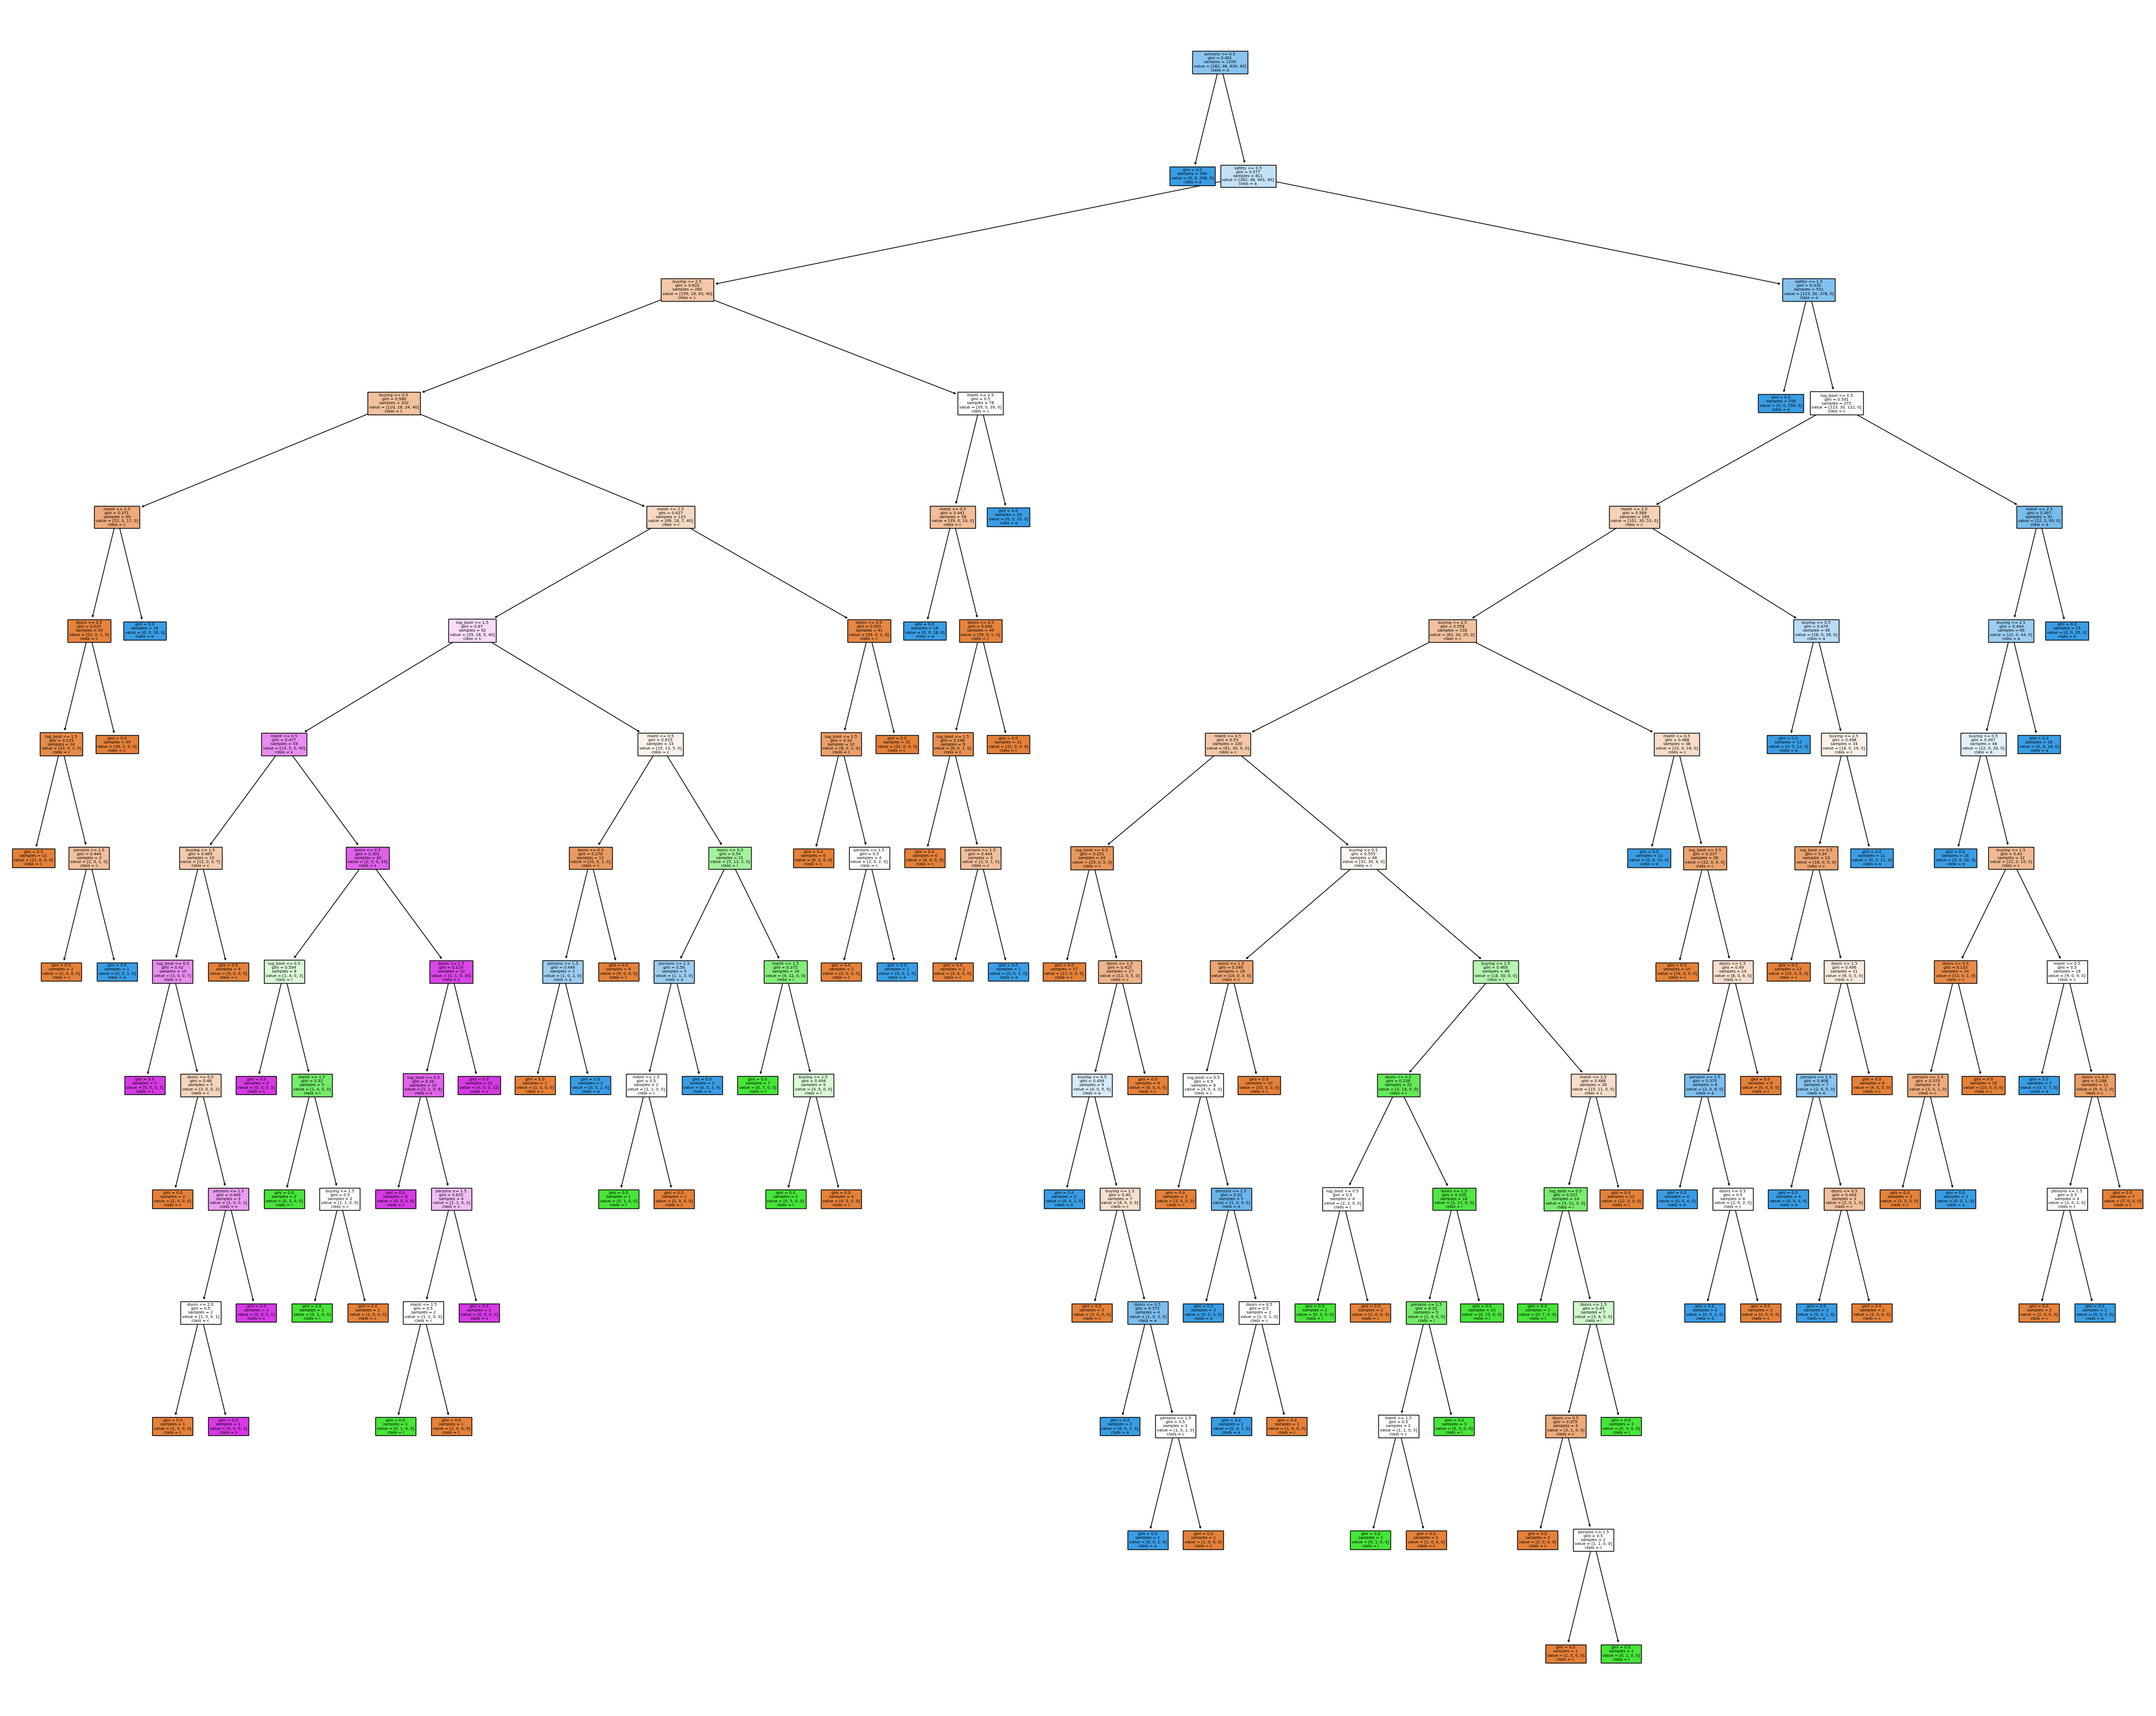

In [21]:
%%time

# It will take 5 to 6 mins to create image so wait.....
fig = plt.figure(figsize = (50,40))
dot_data = tree.plot_tree(model_dt,
                         feature_names=list(df.columns[:-1]),
                         class_names=list(df.columns[-1]),
                         filled = True)
plt.savefig("base_model1.jpeg")

CPU times: total: 922 ms
Wall time: 1.25 s


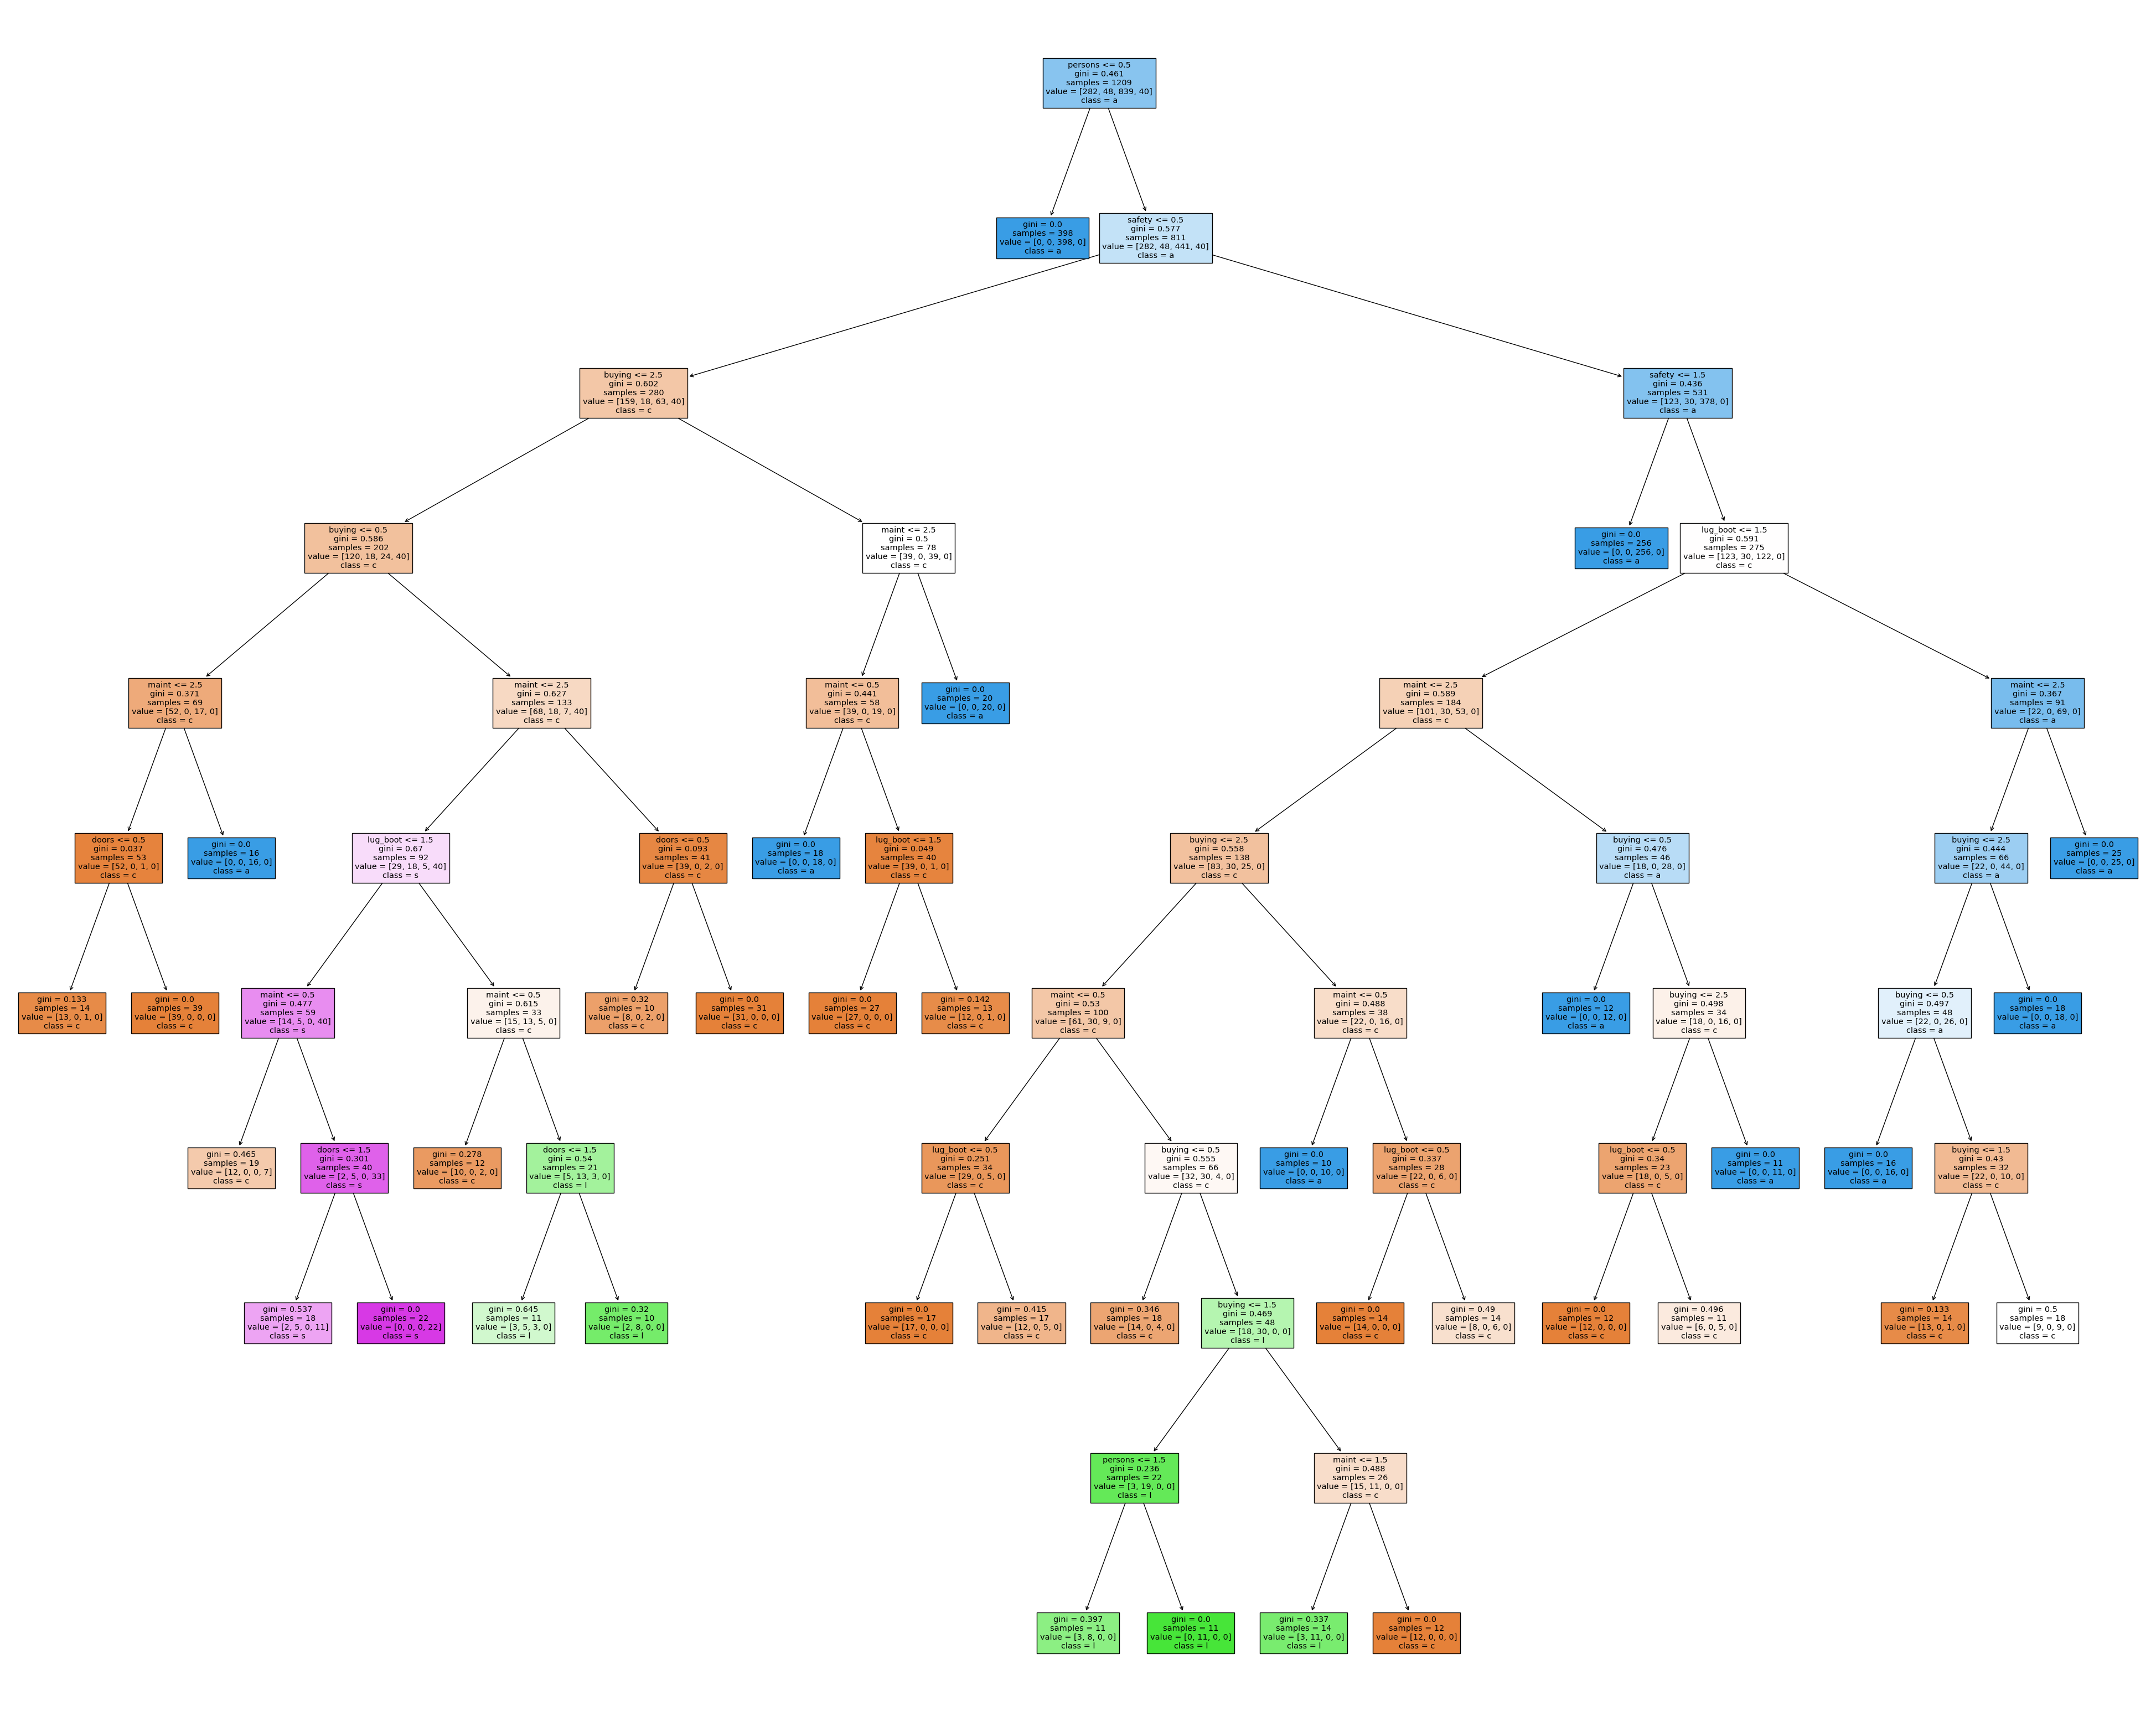

In [22]:
%%time

# It will take 5 to 6 mins to create image so wait.....
fig = plt.figure(figsize = (50,40))
dot_data = tree.plot_tree(model_dt2,
                         feature_names=list(df.columns[:-1]),
                         class_names=list(df.columns[-1]),
                         filled = True)
plt.savefig("tune_model1.jpeg")

#### Using SVM

In [23]:
# create svm object
svc_model = svm.SVC()

# train svm model on train dataset
svc_model.fit(x_train, y_train)

# predict on test dataset
y_pred = svc_model.predict(x_test)

In [24]:
# confusion matrix {'acc':0, 'good':1, 'unacc':2, 'vgood': 3}
print("---------------Confusion Matrix----------------")
print(confusion_matrix(y_test, y_pred))
print()
print("---------------Accuricy Score----------------")
print(accuracy_score(y_test, y_pred))
print()
print("---------------Classification Report----------------")
print(classification_report(y_test, y_pred))
print()

---------------Confusion Matrix----------------
[[ 74   0  28   0]
 [ 14   5   0   2]
 [  4   0 367   0]
 [  6   0   0  19]]

---------------Accuricy Score----------------
0.8959537572254336

---------------Classification Report----------------
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       102
           1       1.00      0.24      0.38        21
           2       0.93      0.99      0.96       371
           3       0.90      0.76      0.83        25

    accuracy                           0.90       519
   macro avg       0.90      0.68      0.73       519
weighted avg       0.90      0.90      0.89       519




## Bagging Approach